![Machine Learning Lab](banner.jpg)


# Laboratorio 3 - Actividad Práctica


## Instrucciones generales


1. Esta actividad debe ser entregada por BN y es de carácter individual. No se permite entregar el laboratorio después de la fecha establecida.
2. Al responder las preguntas de las actividades por favor marcar las respuestas con la sección a la que corresponden, por ejemplo: `## Exploración de datos 2.1`. Es preferible que esto lo hagan con secciones de MarkDown.
3. Por favor nombrar el archivo de acuerdo al siguiente formato `{email}_lab3.ipynb`.
4. Si tienen alguna duda pueden escribirme a mi correo `j.rayom@uniandes.edu.co` o contactarme directamente por Teams

Para este laboratorio deben usar el siguiente dataset: `https://www.kaggle.com/datasets/vishardmehta/heart-risk-progression-dataset`

### Objetivos

1. Comprender la estructura y características del dataset mediante la exploración y visualización de datos para identificar patrones relevantes en la predicción en riesgo de ataques al corazón.

2. Aplicar técnicas de preprocesamiento y modelado utilizando StandardScaler, OneHotEncoder y SVC, evaluando el impacto de diferentes kernels en la frontera de decisión.

3. Optimizar el rendimiento del modelo mediante la búsqueda de hiperparámetros con GridSearchCV.


* * *

Instrucciones
-------------

### 0\. Descarga del Dataset

Utiliza el siguiente enlace para descargar el dataset de riesgos cardiovasculares desde Kaggle:

[Descargar Dataset](https://www.kaggle.com/datasets/vishardmehta/heart-risk-progression-dataset)

El dataset contiene pacientes, donde la columna `risk_category` indica el riesgo de padecer enfermedades cardiovasculares (`Low`, `Medium`, `High`)

### 1\. Exploración de datos (10%)

1.  Carga el dataset en un DataFrame de pandas.
2.  Elimina las columnas `heart_disease_risk_score` y `Patient_ID`.
3.  Realiza un pairplot entre las variables usando seaborne

### 2\. Preprocesamiento de Datos (10%)

1.  Separa las características (`X`) de la etiqueta (`Y`). La columna `risk_category` es la etiqueta.
3.  Divide el dataset en conjuntos de entrenamiento y prueba utilizando `train_test_split` de `sklearn`. **Asegúrate de usar `random_state=42` para garantizar la reproducibilidad de los resultados.**

### 3\. Exploración efecto del kernel (20%)

1. Utilice la función `plot_frontier_svc` definidia abajo para graficar la frontera de decisión entre las clases usando solo las columnas `['systolic_bp', 'age']`. Utilice **`LabelEncoder`** para codificar `Y`. Haga la gráfica para todos los kernels disponibles en sklearn.
2. Compare los resultados usando `C = [0.1, 1, 10, 1000]` y `kernel=rbf`. 
3. Responda las siguientes preguntas

- ¿Usando `rbf` que observa sucede a medida que se incrementa `C` con la frontera de decisión?

### 4\. Entrenamiento y Evaluación (30%)

1. Construye un pipeline en `sklearn` que incluya los siguientes componentes: **`StandardScaler`**, **`OneHotEncoder`** y **`SVC`**. Utilice la clase `Pipeline` de sklearn y utilice el kernel `poly` con C=`1.0`
2. Entrena el modelo con el dataset de entrenamiento
3. Producir el reporte completo de clasificación y la matriz de confusión.

### 5\. Optimizacion de parametros (30%)

1. Construye un pipeline en `sklearn` que incluya los siguientes componentes: **`StandardScaler`**, **`OneHotEncoder`** y **`SVC`**. Utilice la clase `Pipeline` de sklearn
2. Entrena el modelo con el dataset de entrenamiento usando GridSearchCV pruebe todos los kernels disponibles en sklearn y utilice `C = [0.1, 1, 10, 100]`
3. Responsa las siguientes preguntas

- ¿Cuales hiperparámetros arrojaron el mejor modelo?




---

### 1. Exploración de datos

Carga del conjunto de datos **cardiovascular risk dataset** en un Dataframe de Pandas

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [71]:
heart_data = pd.read_csv("../datasets/cardiovascular_risk_dataset.csv")

heart_data.head()

,Patient_ID,age,bmi,systolic_bp,diastolic_bp,cholesterol_mg_dl,resting_heart_rate,smoking_status,daily_steps,stress_level,physical_activity_hours_per_week,sleep_hours,family_history_heart_disease,diet_quality_score,alcohol_units_per_week,heart_disease_risk_score,risk_category
0,1,62,25.0,142,93,247,72,Never,11565,3,5.6,8.2,No,7,0.7,28.1,Medium
1,2,54,29.7,158,101,254,74,Current,4036,8,0.5,6.7,No,5,4.5,63.0,High
2,3,46,36.2,170,113,276,80,Current,3043,9,0.4,4.0,No,1,20.8,73.1,High
3,4,48,30.4,153,98,230,73,Former,5604,5,0.6,8.0,No,4,8.5,39.5,Medium
4,5,46,25.3,139,87,206,69,Current,7464,1,2.0,6.1,No,5,3.6,29.3,Medium


In [72]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient_ID                        5500 non-null   int64  
 1   age                               5500 non-null   int64  
 2   bmi                               5500 non-null   float64
 3   systolic_bp                       5500 non-null   int64  
 4   diastolic_bp                      5500 non-null   int64  
 5   cholesterol_mg_dl                 5500 non-null   int64  
 6   resting_heart_rate                5500 non-null   int64  
 7   smoking_status                    5500 non-null   object 
 8   daily_steps                       5500 non-null   int64  
 9   stress_level                      5500 non-null   int64  
 10  physical_activity_hours_per_week  5500 non-null   float64
 11  sleep_hours                       5500 non-null   float64
 12  family

Eliminación las columnas **heart_disease_risk_score** y **patient_id** del conjunto de datos

In [73]:
heart_data = heart_data.drop(columns = ["heart_disease_risk_score", "Patient_ID"])

In [74]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               5500 non-null   int64  
 1   bmi                               5500 non-null   float64
 2   systolic_bp                       5500 non-null   int64  
 3   diastolic_bp                      5500 non-null   int64  
 4   cholesterol_mg_dl                 5500 non-null   int64  
 5   resting_heart_rate                5500 non-null   int64  
 6   smoking_status                    5500 non-null   object 
 7   daily_steps                       5500 non-null   int64  
 8   stress_level                      5500 non-null   int64  
 9   physical_activity_hours_per_week  5500 non-null   float64
 10  sleep_hours                       5500 non-null   float64
 11  family_history_heart_disease      5500 non-null   object 
 12  diet_q

Gráfico **pairplot** entre las variables haciendo uso de la libreria **seaborn**

In [75]:
# To do - pairplot no tiene sentido

### 2. Preprocesamiento de datos

Separación de las características (14 Columnas) de la variable objetivo **Risk Category**

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X = heart_data.drop("risk_category", axis = 1)
y = heart_data["risk_category"]

In [78]:
X.columns

Index(['age', 'bmi', 'systolic_bp', 'diastolic_bp', 'cholesterol_mg_dl',
       'resting_heart_rate', 'smoking_status', 'daily_steps', 'stress_level',
       'physical_activity_hours_per_week', 'sleep_hours',
       'family_history_heart_disease', 'diet_quality_score',
       'alcohol_units_per_week'],
      dtype='object')

División del conjunto de datos en conjunto de entrenamiento y prueba. Se usa la **semilla 42** para asegurar la reproducibilidad de la divisón de datos

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 3. Exploración del efecto del kernel seleccionado

Gráfica de la forntera de decisión al entrenar un SVM utilizando las características **Systolic BP** y **Age** para predecir la clase **Risk Category**. Se genera la gráfica para cada uno de los kernels disponible en la libreria

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
import numpy as np

In [81]:
def plot_frontier_svc(X_, y_, kernel = "linear", C = 1):
    
    """
    Grafica la frontera de decisión de un clasificador de Máquina de Vectores de Soporte (SVM)
    utilizando conjuntos de datos de entrenamiento y prueba.
    El clasificador SVM es entrenado en la versión escalada de la matriz de características.
    La función visualiza la frontera de decisión.

    :param X_: ndarray
        La matriz de características. Estos datos deben contener únicamente 2 características,
        por ejemplo, ['Glucosa', 'Edad']

    :param y_: ndarray
        Los valores objetivo/etiquetas de clase correspondientes a las filas de la matriz
        de características de entrada.

    :param kernel: str, opcional
        Especifica el tipo de kernel a utilizar en el algoritmo SVM. Por defecto es "linear".
        Otras opciones válidas incluyen "rbf", "poly", "sigmoid", etc.

    :param C: float, opcional
        Parámetro de regularización. La fuerza de la regularización es inversamente
        proporcional a C. Valor por defecto es 1.
    """

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_)

    X_train_, X_test_, y_train_, y_test_ = train_test_split(X_scaled, y_, test_size=0.2, random_state=31)

    svm = SVC(kernel = kernel, C = C)
    svm.fit(X_train_, y_train_)

    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha = 0.3, cmap = ListedColormap(["#ffcccc", "#cce5ff", "#d4edda"]))

    train_df = pd.DataFrame({
        "x": X_train_[:, 0],
        "y": X_train_[:, 1],
        "class": y_train_,
        "set": "train"
    })
    
    test_df = pd.DataFrame({
        "x": X_test_[:, 0],
        "y": X_test_[:, 1],
        "class": y_test_,
        "set": 'test'
    })
    
    df = pd.concat([train_df, test_df])

    sns.scatterplot(data = df, x = "x", y = "y", hue = "class", style = "set", palette = "tab10")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.title(f"Frontera de Decisión del SVM kernel: {kernel} C:{C}")
    plt.legend()
    plt.show()

In [82]:
X_plot = X[["systolic_bp", "age"]].values

In [83]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

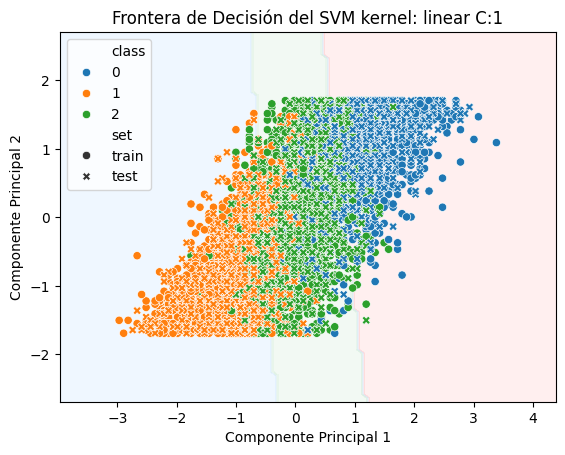

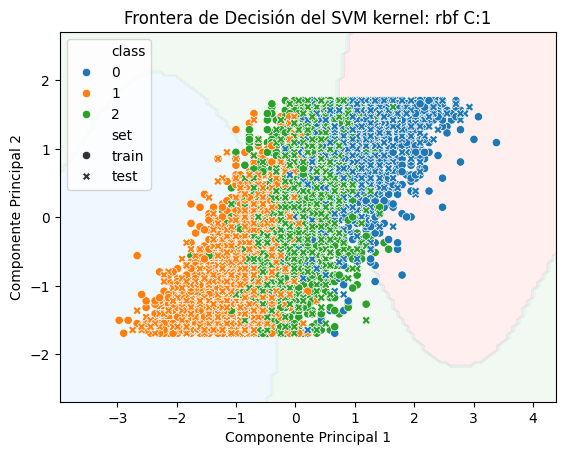

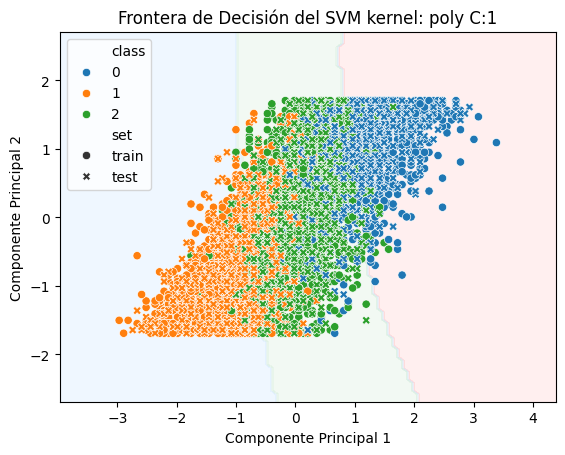

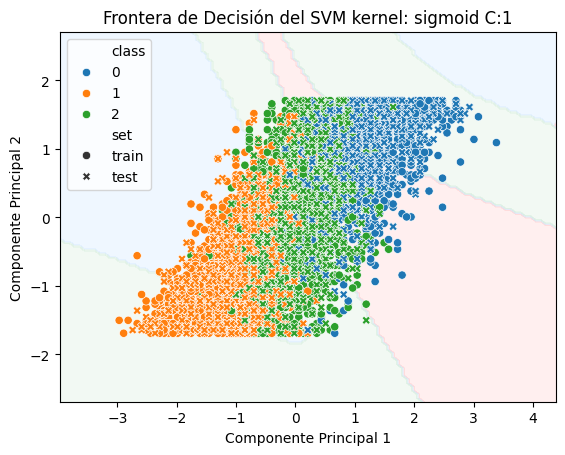

In [84]:
kernels = ["linear", "rbf", "poly", "sigmoid"]

for k in kernels:
    plot_frontier_svc(X_plot, y_encoded, kernel = k, C = 1)

Comparación de los resultados variando el valor de **C** en el rango **0.1** a **1000** usando el kernel **rbf**

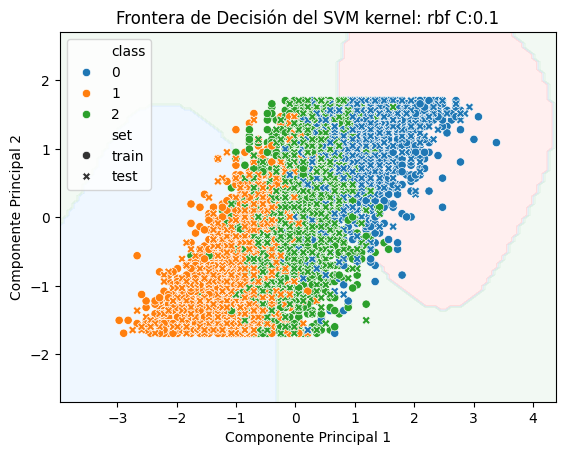

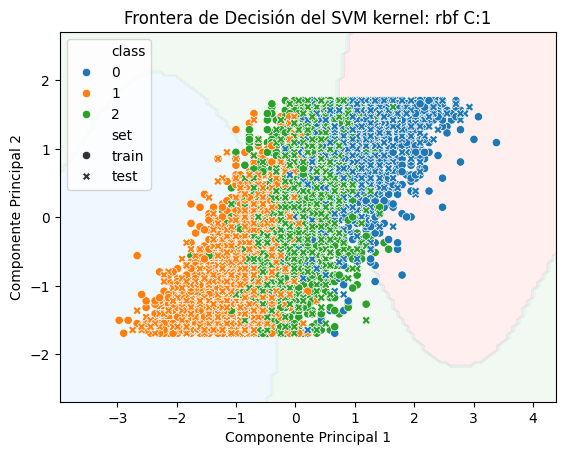

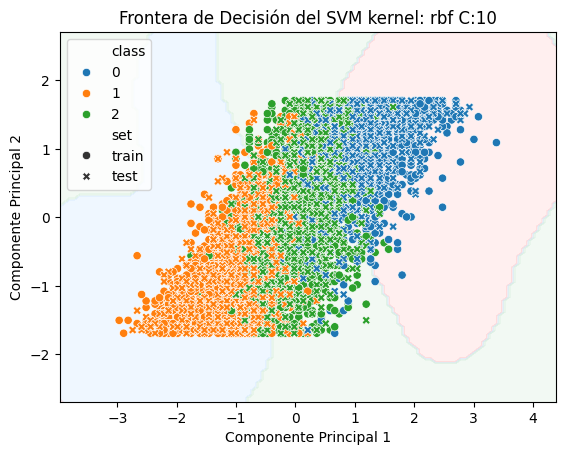

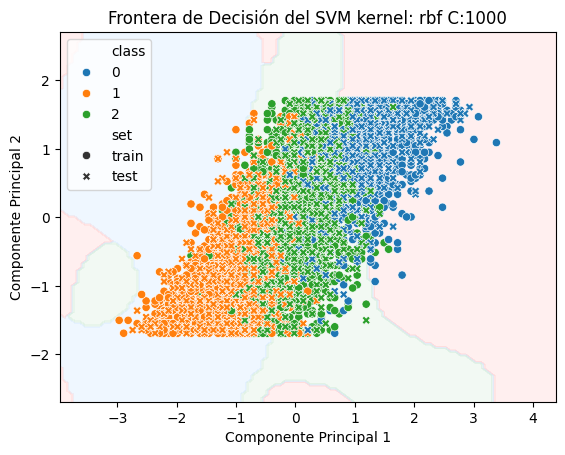

In [85]:
C_values = [0.1, 1, 10, 1000]

for c in C_values:
    plot_frontier_svc(X_plot, y_encoded, kernel = "rbf", C = c)

| Pregunta | Respuesta |
|--------|-----------|
| ¿Usando **rbf** que observa sucede a medida que se incrementa **C** con la frontera de decisión? | A medida que se incrementa el valor de **C**, la frontera de decisión se vuelve progresivamente más compleja e irregular. Con valores pequeños como **C = 0.1**, la frontera es más suave y general, permitiendo cierto margen de error (mayor regularización), lo que puede producir subajuste. A medida que **C** aumenta **(1, 10)**, la frontera se ajusta más a los datos de entrenamiento, reduciendo errores y volviéndose más flexible. Con valores muy altos como **C = 1000**, la frontera se vuelve altamente irregular y comienza a adaptarse incluso a pequeñas variaciones del conjunto de entrenamiento, lo que indica un posible sobreajuste. En resumen, al aumentar **C** disminuye la regularización y el modelo prioriza clasificar correctamente los datos de entrenamiento, generando fronteras más complejas.|


### 4. Entrenamiento y evaluación del modelo

Construcción del **pipeline** para el escalamiento y codificación de las variables, junto con el entrenamiento del modelo **SVM**

In [86]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [87]:
categorical_columns = ["smoking_status", "family_history_heart_disease"]
numeric_columns = [col for col in X.columns if col not in categorical_columns]

In [88]:
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", StandardScaler(), numeric_columns),
        ("categorical", OneHotEncoder(), categorical_columns)
    ]
)

In [89]:
pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel = "poly", C = 1.0))
])

Entrenamiento del modelo sobre el conjunto de datos de entrenamiento definido anteriormente

In [90]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['age', 'bmi', 'systolic_bp',
                                                   'diastolic_bp',
                                                   'cholesterol_mg_dl',
                                                   'resting_heart_rate',
                                                   'daily_steps',
                                                   'stress_level',
                                                   'physical_activity_hours_per_week',
                                                   'sleep_hours',
                                                   'diet_quality_score',
                                                   'alcohol_units_per_week']),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['smoking_status',
                                                   'family_history_heart_disease'])])),
                ('classifier', SVC(kernel='poly'))])

Generación del reporte de clasificación y evaluación de los resultados obtenidos

In [91]:
from sklearn.metrics import classification_report, confusion_matrix

In [92]:
y_pred = pipeline.predict(X_test)

print("CLASSIFICATION REPORT:\n")
print(classification_report(y_test, y_pred))

CLASSIFICATION REPORT:

              precision    recall  f1-score   support

        High       0.97      0.90      0.93       288
         Low       0.96      0.88      0.92       348
      Medium       0.86      0.95      0.90       464

    accuracy                           0.91      1100
   macro avg       0.93      0.91      0.92      1100
weighted avg       0.92      0.91      0.91      1100



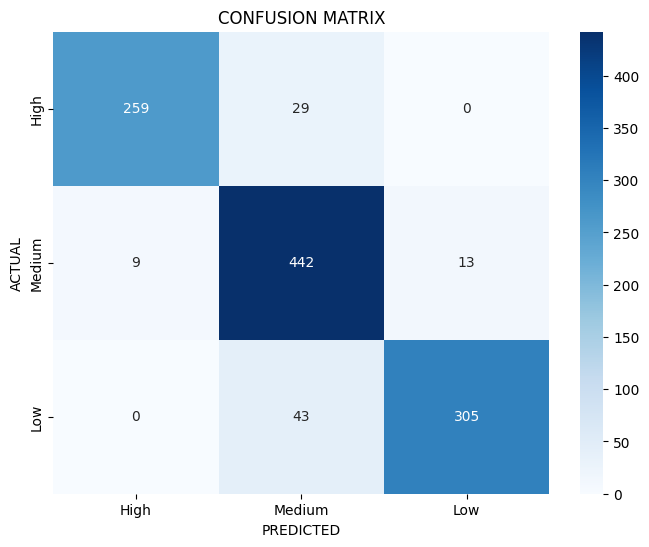

In [93]:
labels = ["High", "Medium", "Low"]
conf_matrix = confusion_matrix(y_test, y_pred, labels = labels)

plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues", xticklabels = labels, yticklabels = labels)
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")
plt.title("CONFUSION MATRIX")
plt.show()

### 5. Optimización de parámetros del modelos

Construcción del **pipeline** para el escalamiento y codificación de las variables, junto con el entrenamiento del modelo **SVM**

In [94]:
categorical_columns = ["smoking_status", "family_history_heart_disease"]
numeric_columns = [col for col in X.columns if col not in categorical_columns]

In [95]:
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", StandardScaler(), numeric_columns),
        ("categorical", OneHotEncoder(), categorical_columns)
    ]
)

In [96]:
pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel = "poly", C = 1.0))
])

Entrenamiento de modelos usando **GridSearchCV** para encontrar la mejor combinación de hiperparámetros sobre el conjunto de datos de entrenamiento

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
param_grid = {
    "classifier__kernel": ["linear", "rbf", "poly", "sigmoid"],
    "classifier__C": [0.1, 1, 10, 100]
}

In [99]:
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv = 5,
    scoring = "accuracy",
    n_jobs = -1
)

In [100]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'bmi',
                                                                          'systolic_bp',
                                                                          'diastolic_bp',
                                                                          'cholesterol_mg_dl',
                                                                          'resting_heart_rate',
                                                                          'daily_steps',
                                                                          'stress_level',
                                                                          'physical_activity_hours_per_week',
                                                                          'sleep_hours',
                                                                          'diet_quality_score',
                                                                          'alcohol_units_per_week']),
                                                                        ('categorical',
                                                                         OneHotEncoder(),
                                                                         ['smoking_status',
                                                                          'family_history_heart_disease'])])),
                                       ('classifier', SVC(kernel='poly'))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__kernel': ['linear', 'rbf', 'poly',
                                                'sigmoid']},
             scoring='accuracy')

In [101]:
print("BEST PARAMETERS:")
print(grid_search.best_params_)

print("\nBEST SCORE:")
print(grid_search.best_score_)

BEST PARAMETERS:
{'classifier__C': 1, 'classifier__kernel': 'linear'}

BEST SCORE:
0.9388636363636363


| Pregunta | Respuesta |
|--------|-----------|
| ¿Cuáles hiperparámetros arrojaron el mejor modelo? | El mejor modelo se obtuvo utilizando un **kernel lineal** (linear) con un parámetro de regularización **C = 1**. Este modelo alcanzó una exactitud promedio en validación cruzada de **0.9389 (93.89%)**. Esto indica que una frontera de decisión lineal fue suficiente para separar adecuadamente las clases, y que un valor intermedio de regularización **(C = 1)** logró un buen balance entre margen amplio y ajuste al entrenamiento.|
